# TP2: Regression logistique

## 1. Recuperation des données
Les données sont stocker dans le fichier banking.csv. Ce dataset contient des information collecter par un centre d'appel pour savoir si un client souscrira (1/0) à un dépôt à terme (variable y) dans une baque.

1-Recuperer les données de ce fichier dans un DataFrame data

2-Afficher les 10 premiere ligne de ce dataframe

3-Afficher le nombre de client par class (1/0)


In [ ]:
#1
import pandas as pd 
df=pd.read_csv('/banking.csv')
#2
df.head(10)







,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [ ]:
#3

print("le nombre de client de class 1: ",len(df[df['y']==1]))
print("le nombre de client de class 0: ",len(df[df['y']==0]))

le nombre de client de class 1:  4640
le nombre de client de class 0:  36548


### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age du client
"emp_var_rate": employment variation rate
"cons_conf_idx": consumer confidence index

1- Creer deux numpy array X et y

X: les trois colonne "age","emp_var_rate" et "cons_conf_idx"

y: "y"

2- Nous allons utiliser **80%** du dataSet pour l'entrainement et **20%** pour le teste du modèle. utiliser la méthode **train_test_split()** du module **sklearn.model_selection** pour créer ces deux sous ensembles (X_train,X_test,y_train,y_test).

3- Creer un objet **LogisticRegression** du module **sklearn.linear_model** et utiliser **(X_train,y_train)** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **predict(X_test)** pour predire les classe des élément de X_test : y_pred

5- Les performences du modele sont alors mesurer à l'aide 4 metriques:
**TP: Nombre de True positives y_test==y_pred==1**

**TN: Nombre de True negatives y_test==y_pred==0**

**FP: Nombre de False positives y_test!=y_pred==1**

**FN: Nombre de False negatives y_test!=y_pred==0**


**$$Accuracy = (TP+TN)/(TP+TN+FP+FN) $$**

Calculer la precision de ce modèle?

6- Ces 4 metriques forment ce qu'on appel une **Confusion Matrix** disponible comme méthode dans le module **sklearn.metrics** :  **Confusion Matrix(y_test, y_pred)**

Recalculer precision de ce modèle on utilisant cette matrice de confusion

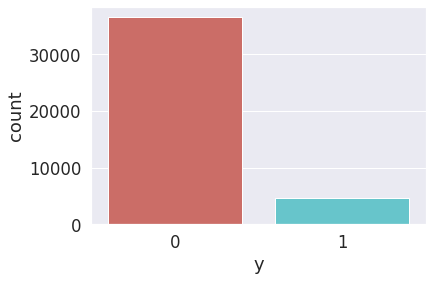

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=df, palette ='hls')
plt.show()

In [ ]:
count_no_sub = len(df[df['y']==0])
count_no_sub

36548

In [ ]:
count_sub = len(df[df['y']==1])
count_sub

4640

In [ ]:
x=df[['age','emp_var_rate','cons_conf_idx']]
y=df['y']
x

,age,emp_var_rate,cons_conf_idx
0,44,1.4,-36.1
1,53,-0.1,-42.0
2,28,-1.7,-39.8
3,39,-1.8,-47.1
4,55,-2.9,-31.4
...,...,...,...
41183,59,1.4,-41.8
41184,31,1.1,-36.4
41185,42,1.1,-36.4
41186,48,-3.4,-26.9


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

In [ ]:
my_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [51]:
print(my_model.predict(X_test))
print(sum(my_model.predict(X_test)))
y_predict=my_model.predict(X_test)

[0 0 0 ... 0 0 0]
94


In [ ]:
#Les performences du modele
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

my_score=accuracy_score(y_test,y_predict)
my_score

0.8823743627093955

In [46]:
#confusion matrix matrix manuell
def confusion_matrix(y_test, y_predict):

    classes = np.unique(y_test)
    matrix = np.zeros((len(classes), len(classes))) 
    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((y_test == classes[i]) & (y_predict == classes[j]))
    return matrix
confusion_matrix(y_test, y_predict)


array([[7235.,   60.],
       [ 909.,   34.]])

In [48]:
#confusion matrix matrix direct
my_confusion=confusion_matrix(y_test,y_predict)
my_confusion

array([[7235.,   60.],
       [ 909.,   34.]])

In [53]:
#Q6
#Les performences du modele manualley
#Accuracy=(TP+TN)/(TP+TN+FP+FN)
Accuracy=(my_confusion[0][0]+my_confusion[0][1])/(np.sum(my_confusion))
print(Accuracy)

0.8855304685603301


### 3- prediction
Voici des information de trois clients:

client1:  {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2:  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3:  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

1- Créer un DataFrame à partir de ce données

2- Lequel de ces client souscrira à un dépôt à terme

In [49]:
#1
clients=[{"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4},{"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4},{"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}]

predict_client=pd.DataFrame(clients)

predict_client


,age,emp_var_rate,cons_conf_idx
0,55,-2.9,31.4
1,45,3.7,4.0
2,39,3.3,6.0


In [50]:
my_model.predict(predict_client)
#2
print("le client : 3")

le client : 3


In [55]:
#on ajoutan un autro variable age
x=df[['age','emp_var_rate','cons_conf_idx','age']]
y=df['y']
x

,age,emp_var_rate,cons_conf_idx,age
0,44,1.4,-36.1,44
1,53,-0.1,-42.0,53
2,28,-1.7,-39.8,28
3,39,-1.8,-47.1,39
4,55,-2.9,-31.4,55
...,...,...,...,...
41183,59,1.4,-41.8,59
41184,31,1.1,-36.4,31
41185,42,1.1,-36.4,42
41186,48,-3.4,-26.9,48


In [64]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
my_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
print(my_model.predict(X_test))
print(sum(my_model.predict(X_test)))
y_predict=my_model.predict(X_test)



[0 0 0 ... 0 0 0]
154


In [63]:
#Les performences du modele
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

my_score=accuracy_score(y_test,y_predict)
my_score

0.8824957513959699

**je remarque apres ajoute un 4'ieme atribu age l'accuracy ne pas augmente**